In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import scipy as sp
import sys
import geopandas as gpd


# Fijar opciones
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', None)

########################################

### Pregunta 1

########################################

### ---> Leer y agregar data adicional

#### 1) Colonias

In [2]:
### Definir path

path_ = r'/Users/juansalgado/Documents/GitHub/prueba_dd360'

In [3]:
properties = pd.read_csv(path_ + r'/files/reto_precios.csv')

properties = gpd.GeoDataFrame(properties, geometry = gpd.points_from_xy(properties.lon, properties.lat))
properties.set_crs(epsg = 4326, inplace = True)

properties.shape

(981, 36)

In [4]:
### Fuente de datos: https://datos.cdmx.gob.mx/dataset/coloniascdmx/resource/f1408eeb-4e97-4548-bc69-61ff83838b1d

colonias = gpd.read_file(path_+ r'/data_adicional/colonias/mgpc_2019.shp', encoding = 'utf-8')

colonias.to_crs("EPSG:4326", inplace = True) # Reproyectar pq viene con coordenadas planas
colonias.rename(columns = {'NOMDT': 'alcaldia', 'NOMUT': 'colonia'}, inplace = True)

colonias.shape

(1815, 9)

In [5]:
### Pegarle la alcaldía a cada propiedad

cols = ['alcaldia', 'colonia', 'geometry']

properties = gpd.sjoin(properties, colonias[cols], predicate = 'within', how = 'left')
properties.drop(columns = ['index_right'], inplace = True)

properties.shape

(981, 38)

In [6]:
### Hay propiedades que no cruzan con alcaldías. Son de otros estados. 

print(properties[properties.alcaldia.isna()].shape)
properties[properties.alcaldia.isna()].head(2)

(37, 38)


,main_name,subtitle,link,location,price,attributes,timestamp,id,address,since,description,vendor,lat,lon,price_mod,price_currency,since_period,since_value,days_on_site,amenities,age_in_years,bathrooms,cellars,num_floors,monthly_fee,apartments_per_floor,disposition,parking_lots,floor_situated,orientation,num_bedrooms,department_type,m2,final_price,price_square_meter,geometry,alcaldia,colonia
53,Venta De Departamento En La Col. Roma. Monterr...,Departamento en venta,https://departamento.metroscubicos.com/MLM-139...,"Alejandría 111, Roma, Monterrey, Nuevo León",2325668 pesos,"40 m² construidos,1 rec.",2022-03-29,54,Alejandría 111,Publicado hace 4 días,Departamentos que van desde 40.3 m2 hasta 86.0...,Century21 Urbana,25.656675,-100.294479,2325668.0,pesos,days,4,4.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1.0,NaN,40.0,2325668.0,58141.700000,POINT (-100.29448 25.65667),NaN,NaN
189,"Preventa De Departamentos, Locales Y Oficinas ...",Departamento en venta,https://departamento.metroscubicos.com/MLM-951...,"2 De Abril 2007, Roma, Monterrey, Nuevo León",4488936 pesos,"103 m² construidos,3 recs.",2022-03-29,194,2 De Abril 2007,Publicado hace 8 meses,"Desarrollo con Departamentos, Locales y Oficin...",Century21 Urbana,25.656226,-100.296627,4488936.0,pesos,months,8,240.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,3.0,NaN,103.1,4488936.0,43539.631426,POINT (-100.29663 25.65623),NaN,NaN


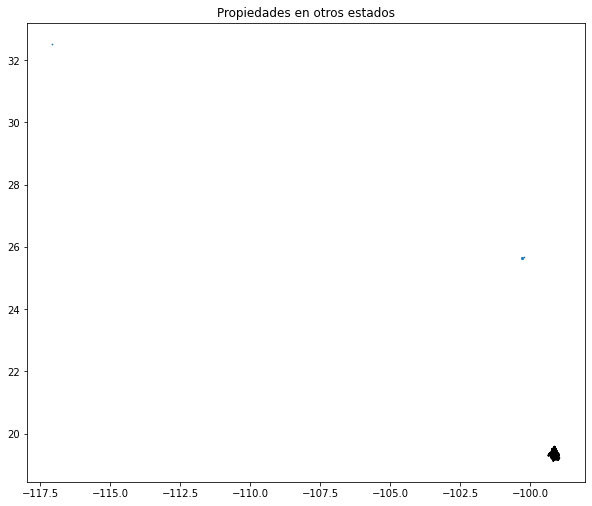

In [7]:
ax = colonias.boundary.plot(figsize = (10, 10), color = 'black')
properties.plot(ax = ax, markersize = 0.5)

plt.title('Propiedades en otros estados')
plt.savefig(path_ + r'/results/pregunta_1/mapa_errores.png', bbox_inches = 'tight', dpi = 400)

In [8]:
### Como son muy pocas decidí eliminarlas para evitar incluirle ruido al análisis

properties = properties[~properties.alcaldia.isna()]

properties.shape

(944, 38)

In [9]:
### Las observaciones son principalmente de Cuauhtémoc

properties.alcaldia.value_counts()

CUAUHTEMOC        923
BENITO JUAREZ      12
MIGUEL HIDALGO      8
ALVARO OBREGON      1
Name: alcaldia, dtype: int64

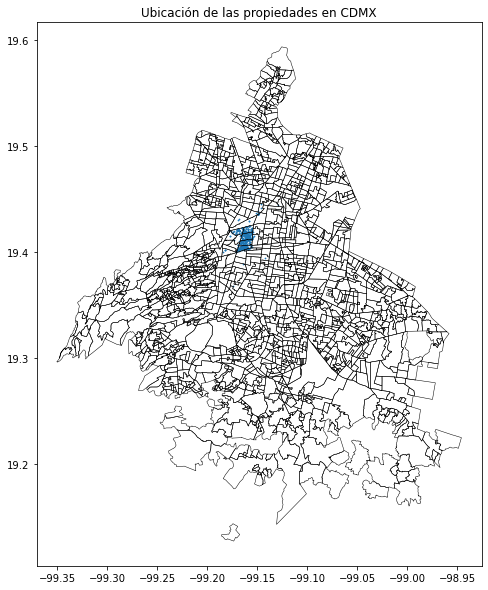

In [10]:
ax = colonias.boundary.plot(figsize = (10, 10), color = 'black', linewidth = 0.5)
properties.plot(ax = ax, markersize = 0.5)

plt.title('Ubicación de las propiedades en CDMX')
plt.savefig(path_ + r'/results/pregunta_1/mapa_properties_ciudad.png', bbox_inches = 'tight', dpi = 400)

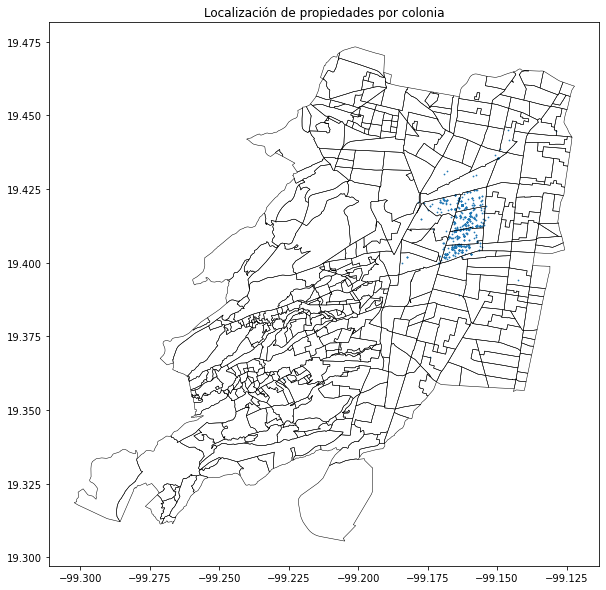

In [11]:
vals = properties.alcaldia.value_counts().index
ax = colonias[colonias.alcaldia.isin(vals)].boundary.plot(figsize = (10, 10), color = 'black', linewidth = 0.5)
properties.plot(ax = ax, markersize = 0.5)

plt.title('Localización de propiedades por colonia')
plt.savefig(path_ + r'/results/pregunta_1/mapa_properties_colonia.png', bbox_inches = 'tight', dpi = 400)

In [12]:
### Las observaciones son principalmente de La Roma

properties.colonia.value_counts()

ROMA NORTE III                      285
ROMA SUR II                         266
ROMA NORTE II                       171
ROMA SUR I                           85
ROMA NORTE I                         75
TABACALERA                           16
PIEDAD NARVARTE                       9
HIPODROMO II                          9
ESCANDON II                           7
GUERRERO III                          3
CONDESA                               3
DOCTORES IV                           2
JUAREZ                                2
HIPODROMO I                           2
CUAUHTEMOC                            2
BOSQUES DE CHAPULTEPEC (POLANCO)      1
MORELOS III                           1
ALAMOS II                             1
DEL VALLE VII                         1
LA MARTINICA                          1
DOCTORES II                           1
DEL VALLE III                         1
Name: colonia, dtype: int64

#### 2) Crimen

In [13]:
### Fuente de los datos: https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj/resource/d543a7b1-f8cb-439f-8a5c-e56c5479eeb5
### Filtré los crimenes para las alcaldias donde tenemos datos, para que no sea tan pesado. 
### Adicionalmente considero crímenes solo para 2021 para capturar las tendencias actuales
### Me tocó hacer estos filtros y guardar la base filtrada para poder subirla al repo

crimen = pd.read_csv(path_ + r'/data_adicional/crimen/victimas_completa_junio_2022.csv', encoding = 'utf-8')

crimen = gpd.GeoDataFrame(crimen, geometry = gpd.points_from_xy(crimen.longitud, crimen.latitud))
crimen.set_crs(epsg = 4326, inplace = True)

crimen.shape

(79518, 23)

In [14]:
crimen.head(2)

,Unnamed: 0.1,Unnamed: 0,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,competencia,Año_hecho,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,AlcaldiaHechos,ColoniaHechos,latitud,longitud,geometry
0,480288,480289,8828678.0,2021.0,Enero,01/01/2021,PORTACION DE ARMA DE FUEGO,DELITO DE BAJO IMPACTO,NaN,NaN,MORAL,OFENDIDO,INCOMPETENCIA,2021.0,Enero,01/01/2021,1740.0,5021.0,CUAUHTEMOC,TABACALERA,19.438573,-99.155624,POINT (-99.15562 19.43857)
1,480291,480292,8828681.0,2021.0,Enero,01/01/2021,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,NaN,NaN,MORAL,VICTIMA,FUERO COMUN,2021.0,Enero,01/01/2021,7200.0,8668.0,CUAUHTEMOC,NONOALCO TLATELOLCO,19.454092,-99.136237,POINT (-99.13624 19.45409)


In [15]:
crimen.Categoria.value_counts()

DELITO DE BAJO IMPACTO                                     69308
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA        4083
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                        1676
HECHO NO DELICTIVO                                          1175
ROBO A NEGOCIO CON VIOLENCIA                                 848
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        580
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        503
VIOLACIÓN                                                    445
HOMICIDIO DOLOSO                                             266
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                215
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                127
ROBO A CASA HABITACIÓN CON VIOLENCIA                         107
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       97
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       71
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                       8
VIOLACIÃ<U+0093>N        

In [16]:
### Recategarizo el crimen para facilidad de trabajo

crimen['categoria_crimen'] = 'na'
crimen.loc[crimen.Categoria.str.contains('ROBO'), 'categoria_crimen'] = 'robo'
crimen.loc[crimen.Categoria.isin(['DELITO DE BAJO IMPACTO', 'HECHO NO DELICTIVO']), 'categoria_crimen'] = 'crimen_no_grave'
crimen.loc[crimen.Categoria.isin(['VIOLACIÓN', 'HOMICIDIO DOLOSO', 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO', 
                                  'VIOLACIÃ<U+0093>N', 'SECUESTRO']), 'categoria_crimen'] = 'crimen_grave'

crimen.shape

(79518, 24)

In [17]:
crimen.categoria_crimen.value_counts()

crimen_no_grave    70483
robo                8102
crimen_grave         933
Name: categoria_crimen, dtype: int64

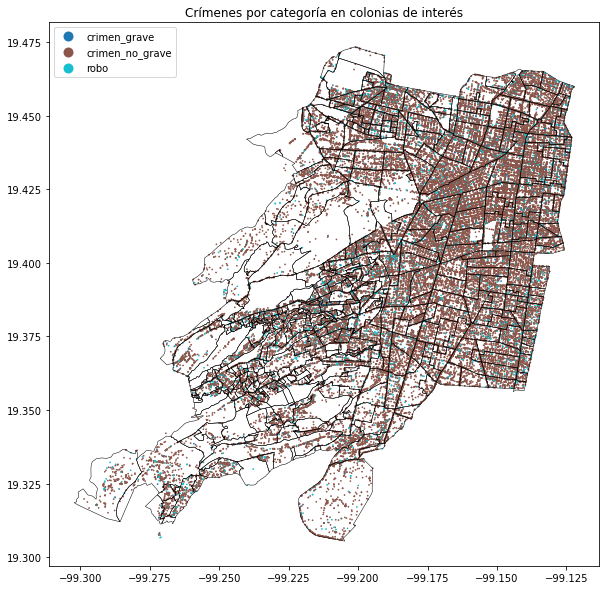

In [18]:
vals = properties.alcaldia.value_counts().index
ax = colonias[colonias.alcaldia.isin(vals)].boundary.plot(figsize = (10, 10), color = 'black', linewidth = 0.5)
crimen.plot(ax = ax, column = 'categoria_crimen', markersize = 0.5, legend = True)

plt.title('Crímenes por categoría en colonias de interés')
plt.savefig(path_ + r'/results/pregunta_1/mapa_crimenes.png', bbox_inches = 'tight', dpi = 400)

In [19]:
### Crear un radio de 200 metros alrededor de cada propiedad, para pegarle la cantidad de crimenes por categoría

prop_radius = properties.copy()

cols = ['link', 'geometry']
prop_radius = prop_radius[cols]

prop_radius.to_crs("EPSG:32634", inplace = True) # Toca reproyectar a un sistema de coordenadas en metros para que el buffer quede en metros
prop_radius.geometry = prop_radius.geometry.buffer(200)
prop_radius.to_crs("EPSG:4326", inplace = True) # Devolver a coordenadas normales

cols = ['categoria_crimen', 'geometry']
prop_radius = gpd.sjoin(prop_radius, crimen[cols], predicate = 'contains', how = 'left')

prop_radius.shape

(34749, 4)

In [20]:
prop_radius.head(2)

,link,geometry,index_right,categoria_crimen
0,https://departamento.metroscubicos.com/MLM-139...,"POLYGON ((-99.16513 19.42184, -99.16508 19.421...",18000.0,crimen_grave
0,https://departamento.metroscubicos.com/MLM-139...,"POLYGON ((-99.16513 19.42184, -99.16508 19.421...",43987.0,crimen_no_grave


In [21]:
prop_radius_group = prop_radius.groupby(['link', 'categoria_crimen'])['geometry'].count().reset_index()

prop_radius_group = pd.pivot_table(prop_radius_group, values = 'geometry', index = ['link'], columns = ['categoria_crimen'], aggfunc=np.sum)
prop_radius_group.reset_index(inplace = True)

prop_radius_group.shape

(943, 4)

In [22]:
properties = properties.merge(prop_radius_group, on = 'link', how = 'left')

properties[['crimen_grave', 'crimen_no_grave', 'robo']] = properties[['crimen_grave', 'crimen_no_grave', 'robo']].fillna(value = 0)

properties.shape

(944, 41)

### ---> Limpiar data y seleccionar variables

In [23]:
### Existen variables con muchos valores nulos

properties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 944 entries, 0 to 943
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   main_name             944 non-null    object  
 1   subtitle              944 non-null    object  
 2   link                  944 non-null    object  
 3   location              944 non-null    object  
 4   price                 944 non-null    object  
 5   attributes            944 non-null    object  
 6   timestamp             944 non-null    object  
 7   id                    944 non-null    int64   
 8   address               677 non-null    object  
 9   since                 944 non-null    object  
 10  description           944 non-null    object  
 11  vendor                944 non-null    object  
 12  lat                   944 non-null    float64 
 13  lon                   944 non-null    float64 
 14  price_mod             944 non-null    float64 
 15

In [24]:
### Todos son dptos

properties.subtitle.value_counts()

Departamento en venta    944
Name: subtitle, dtype: int64

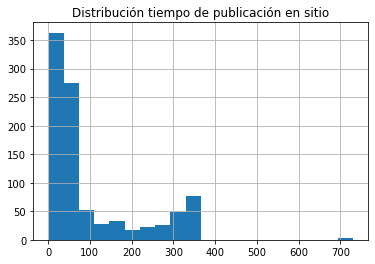

In [25]:
### La mayoría de dptos son de máximo un año, pero hay algunos de casi 2 años. Esto podría ser un problema potencial porque los precios
### cambian en el tiempo, entonces tratar de estimar una relación entre variables de distintos momentos puede incluir ruido al análisis.
### Por lo tanto decidí eliminar las observaciones de más de 1 año en el sitio.

properties.days_on_site.hist(bins = 20)

plt.title('Distribución tiempo de publicación en sitio')
plt.savefig(path_ + r'/results/pregunta_1/dist_tiempo.png', bbox_inches = 'tight', dpi = 400)

In [26]:
properties = properties[properties.days_on_site <= 400]

properties.shape

(941, 41)

In [27]:
### La variable amenities puede ser relevante. Como no hay valores en 0 decido reemplazar los nulos con cero, para poder usar la variable

properties.amenities.value_counts(dropna = False)

NaN    459
4.0    212
5.0    119
2.0     71
3.0     35
6.0     28
7.0     11
1.0      4
8.0      2
Name: amenities, dtype: int64

In [28]:
### Todos los valores de antigüedad son 0. Se podría saber la antigüedad usando catastro, pero por cuestiones de tiempo no lo puedo hacer.
### Por lo tanto esta variable, que es muy relevante para explicar el precio de un inmueble, no la tendré en cuenta.

properties.age_in_years.value_counts(dropna = False)

0.0    941
Name: age_in_years, dtype: int64

In [29]:
### Selecciono las columnas importantes

cols = ['price_square_meter', 'amenities', 'bathrooms', 'parking_lots', 'num_bedrooms', 'm2', 
        'crimen_grave', 'crimen_no_grave', 'robo']
df_model = properties.copy()
df_model = df_model[cols]

### Asumo que los que tengan la variable amenities nula es pq no tienen amenities
df_model.loc[df_model.amenities.isna(), 'amenities'] = 0

df_model.dropna(inplace = True)

df_model.shape

(941, 9)

In [30]:
### Hay valores que se ven raros, particularmente de baños y de área.

df_model.describe()

,price_square_meter,amenities,bathrooms,parking_lots,num_bedrooms,m2,crimen_grave,crimen_no_grave,robo
count,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000,941.000000
mean,61419.038109,2.077577,1.977683,1.331562,2.096706,112.473974,0.111583,33.524973,3.202976
std,19200.329466,2.208142,0.897118,0.479974,0.613847,236.271807,0.431824,12.607692,2.383059
min,582.246879,0.000000,1.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000
25%,53033.707865,0.000000,2.000000,1.000000,2.000000,75.000000,0.000000,23.000000,2.000000
50%,61837.096774,2.000000,2.000000,1.000000,2.000000,93.000000,0.000000,33.000000,3.000000
75%,70866.141732,4.000000,2.000000,2.000000,2.000000,129.000000,0.000000,41.000000,4.000000
max,146524.373626,8.000000,23.000000,3.000000,4.000000,7210.000000,3.000000,82.000000,26.000000


In [31]:
### De estas dos variables eliminaré el 1% más alto, para evitar problemas

for col in ['bathrooms', 'm2']:
    perc = df_model[col].quantile(0.99)
    df_model = df_model[df_model[col] < perc]
    
df_model.shape

(918, 9)

In [32]:
### Ahora si son mas coherentes los valores de todas las variables

df_model.describe()

,price_square_meter,amenities,bathrooms,parking_lots,num_bedrooms,m2,crimen_grave,crimen_no_grave,robo
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,61658.452097,2.092593,1.922658,1.331155,2.076253,102.075174,0.113290,33.674292,3.204793
std,19093.588096,2.187286,0.527859,0.480059,0.605916,41.820958,0.435875,12.627177,2.395356
min,4712.041885,0.000000,1.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000
25%,53333.333333,0.000000,2.000000,1.000000,2.000000,75.000000,0.000000,24.000000,2.000000
50%,61851.134021,2.000000,2.000000,1.000000,2.000000,93.000000,0.000000,33.000000,3.000000
75%,70824.685664,4.000000,2.000000,2.000000,2.000000,127.000000,0.000000,41.750000,4.000000
max,146524.373626,7.000000,3.000000,3.000000,4.000000,270.000000,3.000000,82.000000,26.000000


### ---> Analizar data

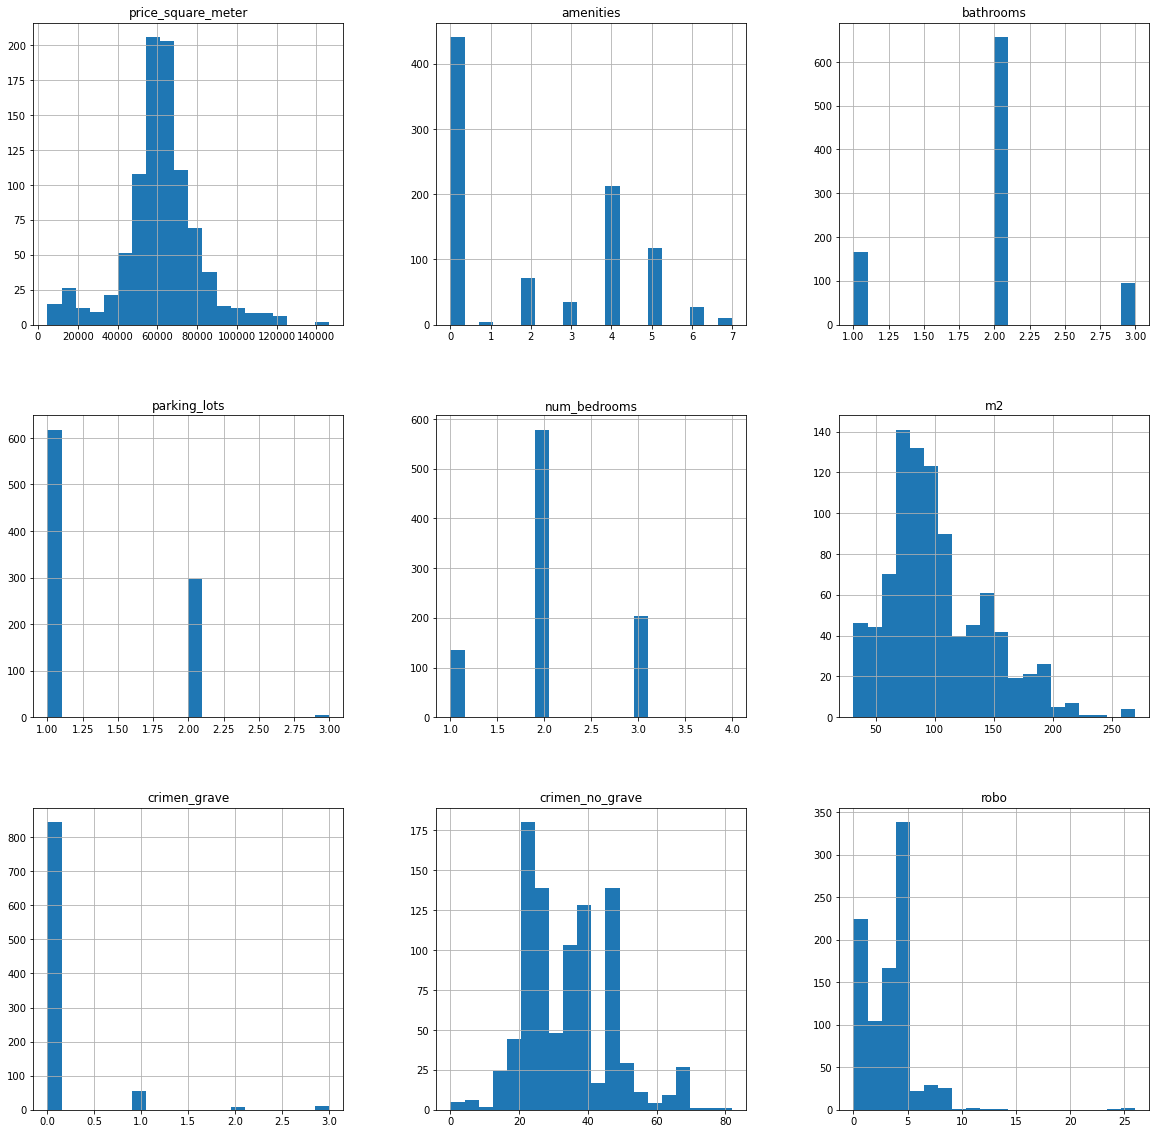

In [33]:
df_model.hist(bins = 20, figsize = (20, 20))

plt.savefig(path_ + r'/results/pregunta_1/histograma_variables.png', bbox_inches = 'tight', dpi = 400)

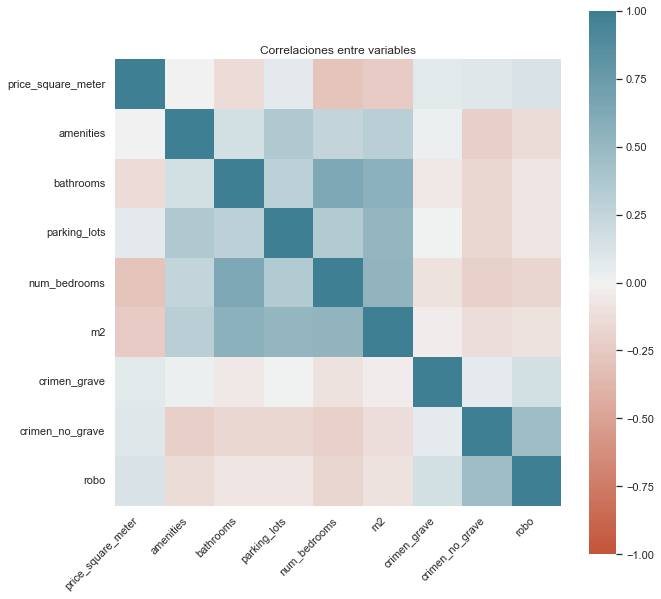

In [34]:
corr = df_model.corr()

sns.set(rc={"figure.figsize":(10, 10)}) #width=8, height=4

ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

plt.title('Correlaciones entre variables')
plt.savefig(path_ + r'/results/pregunta_1/correlaciones_variables.png', bbox_inches = 'tight', dpi = 400)

### ---> Hacer modelos

In [35]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [36]:
### OLS

cols = ['amenities', 'bathrooms', 'parking_lots', 'num_bedrooms', 'm2', 
        'crimen_grave', 'crimen_no_grave', 'robo']
X = df_model.copy()
X = X[cols]
X = sm.add_constant(X)

cols = ['price_square_meter']
y = df_model.copy()
y = y[cols]

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     price_square_meter   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     25.35
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.74e-35
Time:                        08:32:37   Log-Likelihood:                -10258.
No. Observations:                 918   AIC:                         2.053e+04
Df Residuals:                     909   BIC:                         2.058e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             6.58e+04   3308.884     

In [37]:
### OLS precio logaritmo

cols = ['amenities', 'bathrooms', 'parking_lots', 'num_bedrooms', 'm2', 
        'crimen_grave', 'crimen_no_grave', 'robo']
X = df_model.copy()
X = X[cols]
X = sm.add_constant(X)

cols = ['price_square_meter']
y = df_model.copy()
y = y[cols]
y['price_square_meter_log'] = y['price_square_meter'].apply(lambda x: np.log(x))

est = sm.OLS(y['price_square_meter_log'], X)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                              
Dep. Variable:     price_square_meter_log   R-squared:                       0.171
Model:                                OLS   Adj. R-squared:                  0.164
Method:                     Least Squares   F-statistic:                     23.48
Date:                    Sun, 07 Aug 2022   Prob (F-statistic):           6.82e-33
Time:                            08:32:37   Log-Likelihood:                -457.54
No. Observations:                     918   AIC:                             933.1
Df Residuals:                         909   BIC:                             976.5
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
co

In [38]:
### Dividir muestra para testear modelo boosting

from sklearn.model_selection import train_test_split

cols = ['price_square_meter']
y = df_model.copy()
y = y[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [39]:
import xgboost as xgb

model = xgb.XGBRegressor(max_depth = 3, n_estimators = 300, learning_rate = 0.3)
model.fit(X_train, y_train)

precios = y_test.copy()
precios['boosting_pred'] = model.predict(X_test)

### ---> Testear resultados

In [40]:
### Función del MAPE

def mape(y_true, y_pred):
    try:
        division = abs((y_true-y_pred)/y_true)
        sum_ = division.sum()
        mpe = sum_*100/len(y_true)
        return mpe
    except:
        pass

MAPE XG: 25.38 %


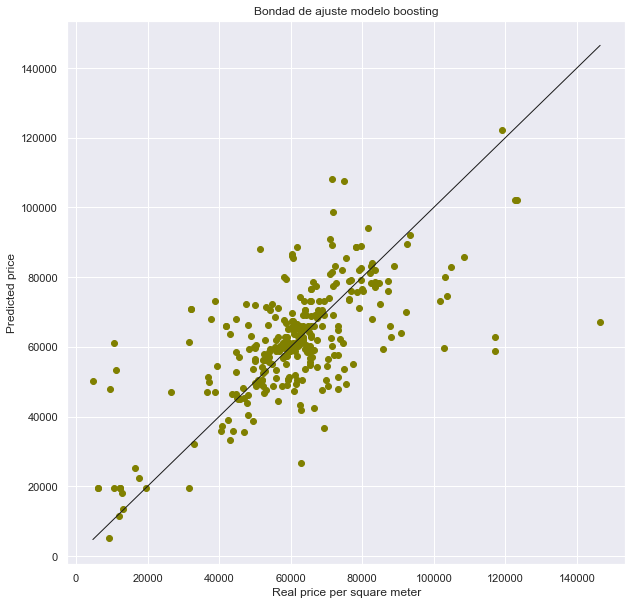

In [41]:
precios.sort_values(by = ['price_square_meter'], ascending = True, inplace = True)
precios.reset_index(inplace = True, drop = True)

y = precios.price_square_meter
y_hat_xg = precios.boosting_pred

plt.scatter(y, y_hat_xg, label = 'price_m2_predicted', color = 'olive', marker="o")
plt.plot(y, y, 'k-', linewidth = 1)

plt.title('Boosting model performance')
plt.ylabel('Predicted price')
plt.xlabel('Real price per square meter')

print('MAPE XG:', round(mape(precios.price_square_meter, y_hat_xg), 2), '%')

plt.title('Bondad de ajuste modelo boosting')
plt.savefig(path_ + r'/results/pregunta_1/boosting_prediction.png', bbox_inches = 'tight', dpi = 400)

########################################

### Pregunta 2

########################################

### ---> Leer data

In [42]:
details = pd.read_csv(path_ + r'/files/places_details.csv')
reviews = pd.read_csv(path_ + r'/files/places_reviews.csv')

details.shape, reviews.shape

((114, 25), (47019, 9))

In [43]:
details.head(2)

,place_id,name,business_status,latitude,longitude,user_ratings_total,rating,website,price_level,photos,sunday_open,sunday_close,monday_open,monday_close,tuesday_open,tuesday_close,wednesday_open,wednesday_close,thursday_open,thursday_close,friday_open,friday_close,saturday_open,saturday_close,tipo_lugar
0,ChIJ_6PxIP_-0YURb-iv-Yq3gPM,La Cocina Tradicional Mexicana,OPERATIONAL,19.388755,-99.141413,104,4.5,https://www.facebook.com/La-Cocina-Tradicional...,NaN,"[{'height': 3120, 'html_attributions': ['<a hr...",0,0,800,1700,800,1700,800,1700,800,1700,800,1700,930,1700,Comida mexicana
1,ChIJ06Wq3J4BzoUREnZuxiDcPo8,Candelilla 16,OPERATIONAL,19.297430,-99.120043,73,4.6,http://candelilla16.mx/,NaN,"[{'height': 3024, 'html_attributions': ['<a hr...",0,0,0,0,0,0,0,0,0,0,0,0,1400,1830,Comida mexicana


In [44]:
reviews.head(2)

,url,reviewer,reviewer_avatar,datetime,rating,text,language,id,place_id
0,https://www.google.com/maps/reviews/data=!4m5!...,Josial Iszsa,https://lh3.googleusercontent.com/a-/AOh14GhZ0...,2020-07-30T00:26:00Z,5.0,"Higiene, medidas de sana distancia, excelente ...",es,17546225955757877359-1596057977.804,ChIJ_6PxIP_-0YURb-iv-Yq3gPM
1,https://www.google.com/maps/reviews/data=!4m5!...,Osvaldo Caballero,https://lh4.googleusercontent.com/-5ebzE6LwgJ4...,2020-07-08T00:18:00Z,5.0,Buen lugar para comer y pasar el rato,es,17546225955757877359-1594156694.121,ChIJ_6PxIP_-0YURb-iv-Yq3gPM


In [45]:
### Me quedo solo con los reviews que existan de los restaurantes en la base de details

df_merge = reviews.merge(details, on = 'place_id', how = 'inner')

df_merge.rename(columns = {'rating_x': 'rating_persona', 'rating_y': 'rating_restaurante'}, 
                inplace = True)

df_merge.shape

(9183, 33)

In [46]:
### No todos los reviews son en español. Para el análisis me quedaré con reviews en español e inglés, pq concentran la mayoría de obs.

df_merge.language.value_counts()

es         8677
en          431
pt           23
sl           11
fr            6
pl            4
gl            3
id            2
sv            2
ko            2
ar            2
ca            2
ja            2
de            2
zh            2
hi            2
zh-Hant       2
it            2
fi            1
tr            1
ro            1
ru            1
ku            1
cs            1
Name: language, dtype: int64

In [47]:
df_merge = df_merge[df_merge.language.isin(['es', 'en'])]

df_merge.shape

(9108, 33)

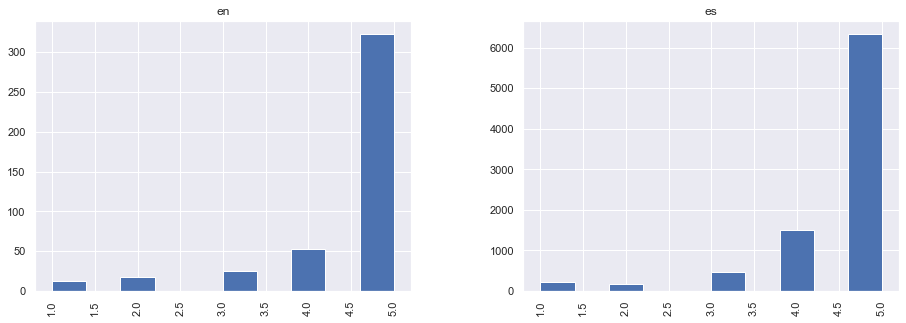

In [48]:
### Los reviews en español e inglés se comportan muy similar

df_merge.rating_persona.hist(by = df_merge['language'], figsize = (15, 5))

plt.savefig(path_ + r'/results/pregunta_2/dist_rating_language.png', bbox_inches = 'tight', dpi = 400)

### ---> Análisis de texto

In [49]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, ImageColorGenerator
from nltk.stem import SnowballStemmer
import gensim

In [50]:
df_spanish = df_merge.copy()
df_spanish = df_spanish[df_spanish.language == 'es']

df_english = df_merge.copy()
df_english = df_english[df_english.language == 'en']

df_spanish.shape, df_english.shape

((8677, 33), (431, 33))

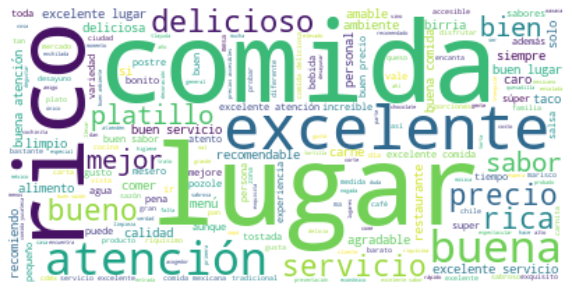

In [51]:
### Crear wordcloud para reviews en español

text = " ".join(review.lower() for review in df_spanish.text)

STOPWORDS = set(stopwords.words('spanish'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_esp.png', bbox_inches = 'tight', dpi = 400)

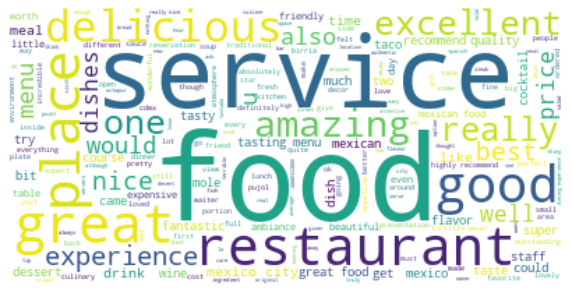

In [52]:
### Crear wordcloud para reviews en ingles

text = " ".join(review.lower() for review in df_english.text)

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_eng.png', bbox_inches = 'tight', dpi = 400)

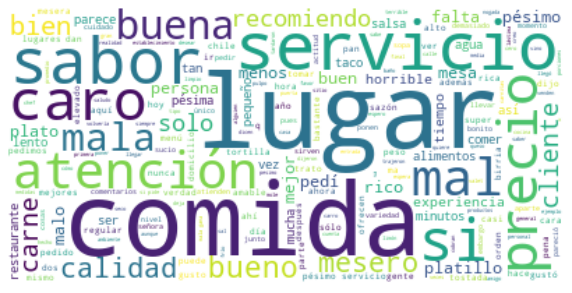

In [53]:
### Crear wordcloud para reviews en español con calificación baja

text = " ".join(review.lower() for review in df_spanish[df_spanish.rating_persona <= 2].text)

STOPWORDS = set(stopwords.words('spanish'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_esp_baja.png', bbox_inches = 'tight', dpi = 400)

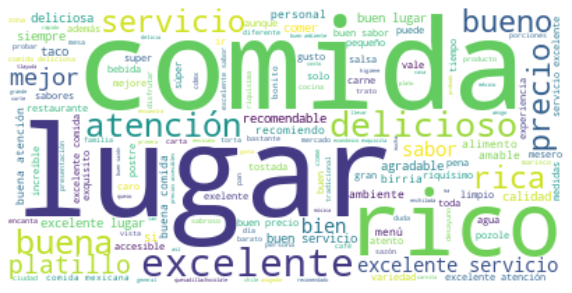

In [54]:
### Crear wordcloud para reviews en español con calificación alta

text = " ".join(review.lower() for review in df_spanish[df_spanish.rating_persona >= 4].text)

STOPWORDS = set(stopwords.words('spanish'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_esp_alta.png', bbox_inches = 'tight', dpi = 400)

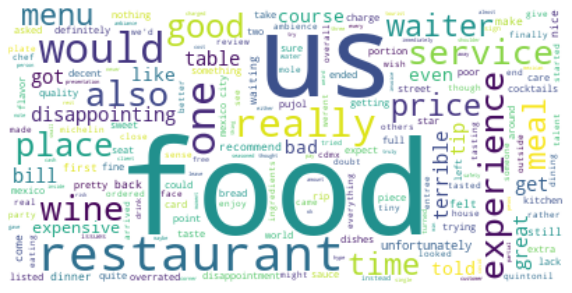

In [55]:
### Crear wordcloud para reviews en ingles con calificacion baja

text = " ".join(review.lower() for review in df_english[df_english.rating_persona <= 2].text)

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_eng_baja.png', bbox_inches = 'tight', dpi = 400)

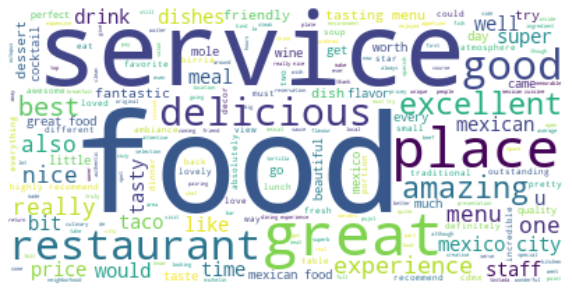

In [56]:
### Crear wordcloud para reviews en ingles con calificacion alta

text = " ".join(review.lower() for review in df_english[df_english.rating_persona >= 4].text)

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update([",", "."])

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path_ + r'/results/pregunta_2/pal_comun_eng_alta.png', bbox_inches = 'tight', dpi = 400)

### ---> Topic modelling

In [57]:
### Preprocesar data: tokenizar

df_spanish["tokens"] = df_spanish.text.apply(lambda x: word_tokenize(x.lower()))
df_english["tokens"] = df_english.text.apply(lambda x: word_tokenize(x.lower()))

In [58]:
### Preprocesar data: quitar stopwords y dígitos

def stop_digit(tokens, language):
    """
    Filtra stopwords y digitos de una lista de tokens.
    """
    STOPWORDS = set(stopwords.words(language))
    STOPWORDS.update([",", ".", '!', ")", "(", "’"])
    return [token for token in tokens if token not in STOPWORDS and not token.isdigit()]

df_spanish["tokens"] = df_spanish.tokens.apply(lambda x: stop_digit(x, 'spanish'))
df_english["tokens"] = df_english.tokens.apply(lambda x: stop_digit(x, 'english'))

In [59]:
### Preprocesar data: extraer la ra'iz de cada palabra

def stem_palabras(tokens, language):
    """
    Reduce cada palabra de una lista dada a su raíz.
    """
    stemmer = SnowballStemmer(language)
    return [stemmer.stem(token) for token in tokens]

df_spanish["tokens"] = df_spanish.tokens.apply(lambda x: stem_palabras(x, 'spanish'))
df_english["tokens"] = df_english.tokens.apply(lambda x: stem_palabras(x, 'english'))

In [60]:
### Crear un diccionario que contiene la frecuencia de cada token en cada review.

dictionary_spanish = gensim.corpora.Dictionary(df_spanish["tokens"])
dictionary_english = gensim.corpora.Dictionary(df_english["tokens"])


### Bag of words usando frecuencia de palabras en cada diccionario

bow_spanish = [dictionary_spanish.doc2bow(doc) for doc in df_spanish["tokens"]]
bow_english = [dictionary_english.doc2bow(doc) for doc in df_english["tokens"]]

In [61]:
### Estimar temas usando modelo lda

lda_model_spanish = gensim.models.LdaMulticore(bow_spanish, num_topics = 10, id2word = dictionary_spanish, passes = 2, workers=2)
lda_model_english = gensim.models.LdaMulticore(bow_english, num_topics = 10, id2word = dictionary_english, passes = 2, workers=2)

In [62]:
### Palabras comunes en cada tema identificado

for idx, topic in lda_model_spanish.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.052*"com" + 0.045*"ric" + 0.028*"excelent" + 0.024*"delici" + 0.022*"atencion" + 0.012*"buen" + 0.010*"ambient" + 0.009*"..." + 0.009*"recomend" + 0.008*"sabros"
Topic: 1 
Words: 0.050*"excelent" + 0.043*"bien" + 0.033*"servici" + 0.023*"ric" + 0.019*"com" + 0.017*"atencion" + 0.016*"lug" + 0.013*"siempr" + 0.012*"preci" + 0.011*"platill"
Topic: 2 
Words: 0.049*"buen" + 0.028*"com" + 0.025*"lug" + 0.023*"servici" + 0.022*"excelent" + 0.022*"tac" + 0.022*"atencion" + 0.020*"delici" + 0.019*"ric" + 0.018*"exelent"
Topic: 3 
Words: 0.069*"excelent" + 0.060*"lug" + 0.050*"buen" + 0.047*"com" + 0.026*"preci" + 0.026*"atencion" + 0.023*"servici" + 0.020*"ric" + 0.016*"agrad" + 0.015*"ambient"
Topic: 4 
Words: 0.037*"delici" + 0.022*"riquisim" + 0.016*"lug" + 0.014*"sup" + 0.013*"tac" + 0.013*"mejor" + 0.010*"com" + 0.010*"recom" + 0.009*"excelent" + 0.009*"ric"
Topic: 5 
Words: 0.043*"buen" + 0.042*"com" + 0.036*"lug" + 0.027*"mejor" + 0.024*"ric" + 0.024*"recomend" + 0.02

In [63]:
### Palabras comunes en cada tema identificado

for idx, topic in lda_model_english.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"restaur" + 0.015*"place" + 0.011*"experi" + 0.010*"us" + 0.010*"one" + 0.009*"food" + 0.008*"servic" + 0.008*"good" + 0.007*"nice" + 0.007*"delici"
Topic: 1 
Words: 0.015*"amaz" + 0.013*"servic" + 0.012*"food" + 0.011*"taco" + 0.010*"good" + 0.010*"best" + 0.010*"well" + 0.009*"love" + 0.009*"place" + 0.008*"one"
Topic: 2 
Words: 0.018*"food" + 0.012*"us" + 0.012*"would" + 0.011*"tast" + 0.011*"realli" + 0.010*"mexico" + 0.008*"great" + 0.008*"wine" + 0.008*"menu" + 0.007*"citi"
Topic: 3 
Words: 0.030*"food" + 0.014*"servic" + 0.014*"delici" + 0.012*"one" + 0.011*"place" + 0.011*"us" + 0.010*"high" + 0.008*"menu" + 0.007*"mexican" + 0.007*"dessert"
Topic: 4 
Words: 0.046*"food" + 0.027*"restaur" + 0.021*"servic" + 0.020*"great" + 0.020*"nice" + 0.017*"amaz" + 0.011*"excel" + 0.011*"mexican" + 0.011*"place" + 0.010*"experi"
Topic: 5 
Words: 0.016*"good" + 0.015*"menu" + 0.015*"super" + 0.014*"great" + 0.014*"servic" + 0.011*"restaur" + 0.008*"food" + 0.008*"one" 